# Importing data and merging

In [58]:
import pandas as pd
import numpy as np

In [2]:
values_df = pd.read_csv('train_set_values.csv')
values_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
labels_df = pd.read_csv('train_set_labels.csv')
labels_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
df= pd.merge(values_df, labels_df, on = 'id' )
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [6]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Make this column categorical. Reduce the number of categories

In [7]:
# sum(df['funder'].value_counts() <= 20)

In [8]:
# len(df['funder'].unique())

In [9]:
ind  = df.isna().sum() > 0

In [10]:
df.columns[ind]

Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

In [13]:
for col in df.columns[df.isna().sum() > 0]:
    mode = df[col].mode()[0]
    df[col].fillna(value = mode, inplace = True)

In [17]:
df.isna().any().any()

False

dropping unwanted columns

In [19]:
to_drop = ['id','funder', 'num_private', 'subvillage', 'region_code', 'recorded_by', 'source_type', 'waterpoint_type', 'scheme_name']

In [20]:
df.drop(columns = to_drop, inplace = True)

In [21]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'region', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_class',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [26]:
df['status_group'] = df['status_group'].map({'functional': 2, 'functional needs repair': 1, 'non functional': 0})

In [32]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [35]:
df['date_recorded'].sort_values()

2601    2002-10-14
27501   2004-01-07
42343   2004-03-01
23373   2004-03-01
33942   2004-03-01
           ...    
36137   2013-12-03
36179   2013-12-03
13245   2013-12-03
38775   2013-12-03
45026   2013-12-03
Name: date_recorded, Length: 59400, dtype: datetime64[ns]

In [36]:
df['year_recorded'] = df['date_recorded'].dt.year

In [37]:
df['month_recorded'] = df['date_recorded'].dt.month

In [38]:
df.drop(columns = 'date_recorded', inplace = True)

In [39]:
df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,wpt_name,basin,region,district_code,...,water_quality,quality_group,quantity,quantity_group,source,source_class,waterpoint_type_group,status_group,year_recorded,month_recorded
0,69572,6000.0,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,5,...,soft,good,enough,enough,spring,groundwater,communal standpipe,2,2011,3
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,2,...,soft,good,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,2,2013,3
2,34310,25.0,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,4,...,soft,good,enough,enough,dam,surface,communal standpipe,2,2013,2
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,63,...,soft,good,dry,dry,machine dbh,groundwater,communal standpipe,0,2013,1
4,19728,0.0,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kagera,1,...,soft,good,seasonal,seasonal,rainwater harvesting,surface,communal standpipe,2,2011,7


In [41]:
df.to_csv('cleaned_columns_dropped.csv')

# Running a few Baseline models

In [152]:
encoded = pd.read_csv('encoded_data.csv')

In [153]:
encoded.head()

,Unnamed: 0,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,...,80,81,82,83,84,85,86,87,88,89
0,0,69572,6000.0,1390,34.938093,-9.856322,109,True,False,1999,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,8776,0.0,1399,34.698766,-2.147466,280,True,True,2010,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,34310,25.0,686,37.460664,-3.821329,250,True,True,2009,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,67743,0.0,263,38.486161,-11.155298,58,True,True,1986,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,19728,0.0,0,31.130847,-1.825359,0,True,True,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [154]:
encoded.columns[encoded.dtypes == object]

Index([], dtype='object')

In [155]:
y = encoded['status_group']
X = encoded.drop(columns = ['status_group', 'Unnamed: 0'])

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# PCA

In [157]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# fit PCA, get explained variance of ALL features
pca_all = PCA(n_components=None)
pca_all.fit(scaler.transform(X_train))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [158]:
explained_var = np.cumsum(pca_all.explained_variance_ratio_)
explained_var

array([0.07933345, 0.12884608, 0.17018369, 0.20464897, 0.23571593,
       0.26526439, 0.29384064, 0.32128197, 0.34728564, 0.37235545,
       0.39560336, 0.41703147, 0.43712208, 0.45679326, 0.4761191 ,
       0.49487533, 0.51342796, 0.5317456 , 0.54986631, 0.56788048,
       0.58567907, 0.60320575, 0.61956413, 0.63548859, 0.65022146,
       0.66449967, 0.67709824, 0.68937773, 0.70133303, 0.7119979 ,
       0.72247326, 0.73273653, 0.7426586 , 0.75232366, 0.76178379,
       0.77117642, 0.78050596, 0.78968869, 0.79884427, 0.8079724 ,
       0.81707558, 0.82616051, 0.83520293, 0.84422203, 0.85318003,
       0.8620015 , 0.87060701, 0.87909461, 0.88737839, 0.89548199,
       0.90327083, 0.91100967, 0.91840237, 0.92555979, 0.93247979,
       0.93909256, 0.94557028, 0.95179584, 0.95765786, 0.96297731,
       0.9681958 , 0.9732295 , 0.97776027, 0.98195084, 0.98530593,
       0.98845744, 0.99134503, 0.99416324, 0.99608047, 0.99781664,
       0.99927386, 1.        , 1.        , 1.        , 1.     

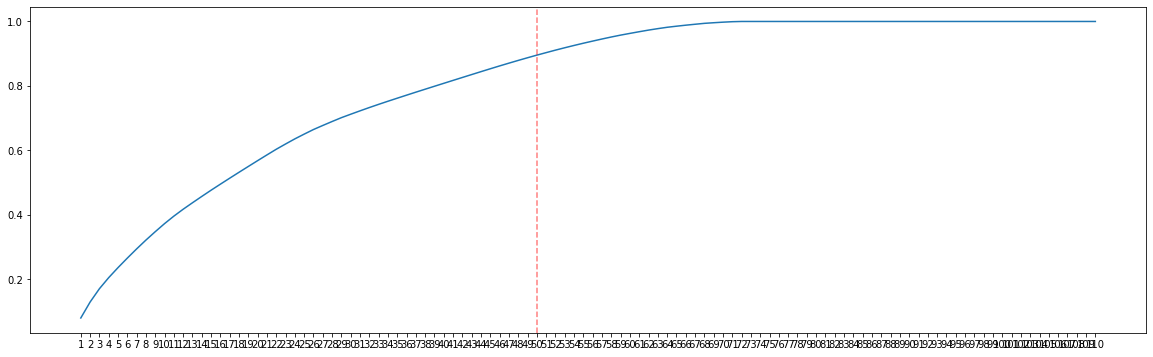

Cumulative explained variance at 50 components: 0.90327


In [159]:
from matplotlib import pyplot as plt
%matplotlib inline

x_axis = np.arange(X_train.shape[1]) + 1
plt.figure(figsize = (20, 6))
plt.plot(x_axis, explained_var)

# At which point to cut off?
minexp = np.where(explained_var > 0.9)[0][0]
plt.axvline(x=minexp, linestyle='dashed', color='red', alpha=0.5)
plt.xticks(x_axis)
plt.show()

print("Cumulative explained variance at %i components: %.5f" % (minexp, explained_var[minexp]))

Trying LightGBM

In [160]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [176]:
lgbm = LGBMClassifier(max_depth = 8, n_estimators = 100,  random_state=42)

In [177]:
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [178]:
preds = lgbm.predict(X_test)

In [179]:
accuracy_score(y_test, preds)

0.803030303030303

In [180]:
accuracy_score(y_train, lgbm.predict(X_train))

0.818294051627385